# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import optimize
from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.metrics import classification_report, confusion_matrix
import time

In [ ]:
df = pd.read_csv("diabetic_data.csv")

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Variable Description

**Encounter ID:** Unique identifier of an encounter

**Patient number:** Unique identifier of a patient

**Race Values:** Caucasian, Asian, African American, Hispanic, and other

**Gender Values:** male, female, and unknown/invalid

**Age:** Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight:** Weight in pounds

**Admission type:** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

**Discharge disposition:** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source:** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

**Time in hospital:** Integer number of days between admission and discharge

**Payer code :** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

**Medical specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures:** Number of lab tests performed during the encounter

**Number of procedures:** Numeric Number of procedures (other than lab tests) performed during the encounter

**Number of medications:** Number of distinct generic names administered during the encounter

**Number of outpatient visits:** Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits:** Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits:** Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses :** Number of diagnoses entered to the system 0%

**Glucose serum test :** result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c test result :** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications :** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications :** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted:** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission



In [ ]:
print('Shape of data:',df.shape)

Shape of data: (101766, 50)


In [ ]:
#total number of columns in df
print('Total number of columns in df:',len(df.columns))

Total number of columns in df: 50


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Exploratory Data Analysis

In [ ]:
#total number of unique values in data each readmitted column
print('Total number of unique values in data each readmitted column:',df['readmitted'].nunique())
#show the unique values in readmitted column
print('Unique values in readmitted column:',df['readmitted'].unique())

Total number of unique values in data each readmitted column: 3
Unique values in readmitted column: ['NO' '>30' '<30']


In [ ]:
#total readmitted values
print('Total readmitted values:',df['readmitted'].value_counts())

Total readmitted values: readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


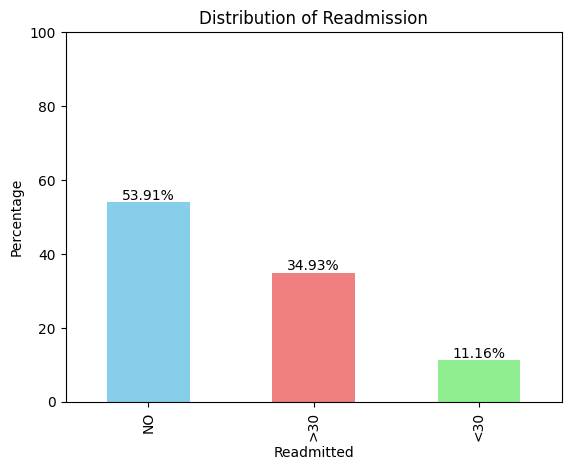

In [ ]:
# Calculating the percentage of each category in 'readmitted' column
readmitted_percentages = df['readmitted'].value_counts(normalize=True) * 100

colors = ['skyblue', 'lightcoral', 'lightgreen']
ax = readmitted_percentages.plot(kind='bar', color=colors)

plt.xlabel('Readmitted')
plt.ylabel('Percentage')
plt.title('Distribution of Readmission')

plt.ylim(0, 100)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Encoding the outcome variable:** The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [ ]:
df['readmitted_class'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0 if x == 'NO' else 0)

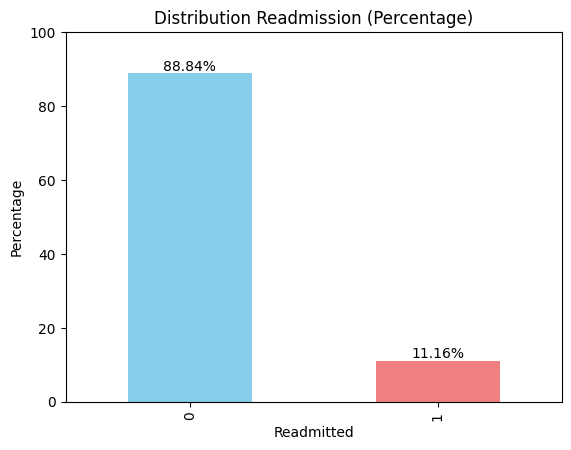

In [ ]:
# Calculate the percentage of each category in 'readmitted'
readmitted_percentages = df['readmitted_class'].value_counts(normalize=True) * 100

colors = ['skyblue', 'lightcoral', 'lightgreen']
ax = readmitted_percentages.plot(kind='bar', color=colors)

plt.xlabel('Readmitted')
plt.ylabel('Percentage')
plt.title('Distribution Readmission (Percentage)')

plt.ylim(0, 100)

# Displaying the percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

### Checking numerical columns

In [ ]:
# Displaying information about numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted_class'],
      dtype='object')

We observe that the dataset has 14 numerical columns. However, the columns admission_type_id, discharge_disposition_id, admission_source_id are mappings to various categories. Below are the tables corresponding to these columns and what each value specifies.

In [ ]:
#Mapping the IDS_mapping.xlsx with the main dataframe on "Admission_type_id","Admission_source_id","Discharge_disposition_id"

adm_type = pd.read_csv("IDS_mapping1.csv")
df['admission_type_id'] = df['admission_type_id'].astype(str)
adm_type['admission_type_id'] = adm_type['admission_type_id'].astype(str)

adm_source = pd.read_csv("IDS_mapping2.csv")
df['admission_source_id'] = df['admission_source_id'].astype(str)
adm_source['admission_source_id'] = adm_source['admission_source_id'].astype(str)

discharge_d = pd.read_csv("IDS_mapping3.csv")
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
discharge_d['discharge_disposition_id'] = discharge_d['discharge_disposition_id'].astype(str)

df = pd.merge(df, adm_type, on='admission_type_id' , how='left')
df.rename(columns={'description':'admission_type'}, inplace=True)

df = pd.merge(df, adm_source, on='admission_source_id' , how='left')
df.rename(columns={'Admission type':'Admission_source'}, inplace=True)

df = pd.merge(df, discharge_d, on='discharge_disposition_id' , how='left')
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_class,admission_type,Admission_source,Discharge_type
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,NO,0,NaN,Physician Referral,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,Ch,Yes,>30,0,Emergency,Emergency Room,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,Yes,NO,0,Emergency,Emergency Room,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,Ch,Yes,NO,0,Emergency,Emergency Room,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,Ch,Yes,NO,0,Emergency,Emergency Room,Discharged to home


In [ ]:
adm_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
discharge_d

,discharge_disposition_id,Discharge_type
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [ ]:
adm_source

,admission_source_id,Admission type
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


Some of these categories are found to be similar to each other. Due to the similar references of these categories, we decided to club them into fewer categories to make our model efficient

In [ ]:
# re-encoding admission type, discharge type and admission source into fewer categories
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(18,26)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,26)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)

In [ ]:
print(df['admission_type'].value_counts())

admission_type
Emergency        53990
Elective         18869
Urgent           18480
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: count, dtype: int64


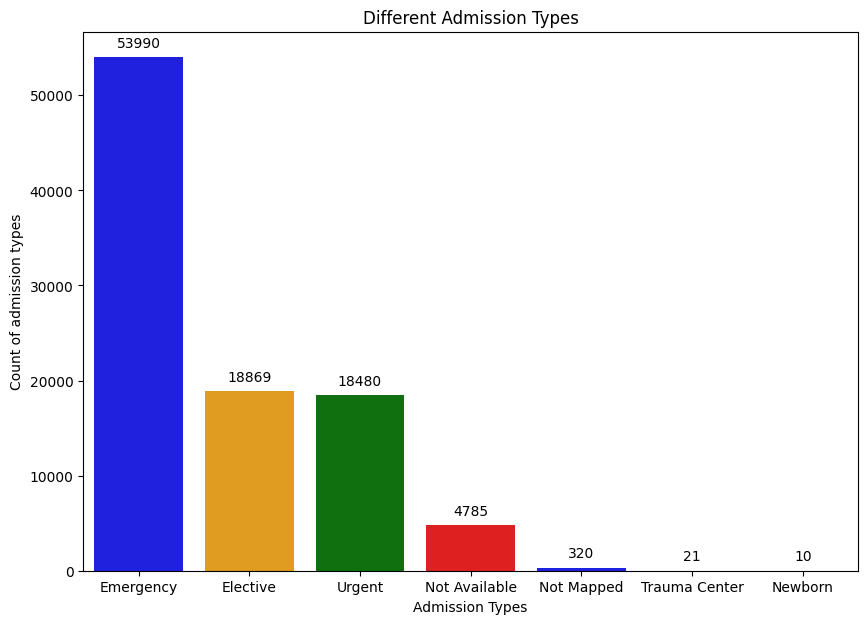

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['Blue', 'Orange', 'Green', 'Red']

# Creating the barplot
ax = sns.barplot(x=df['admission_type'].value_counts().index, y=df['admission_type'].value_counts(), palette=colors)

# Annotating each bar with its rounded count
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Different Admission Types")
plt.xlabel("Admission Types")
plt.ylabel("Count of admission types")
plt.show()

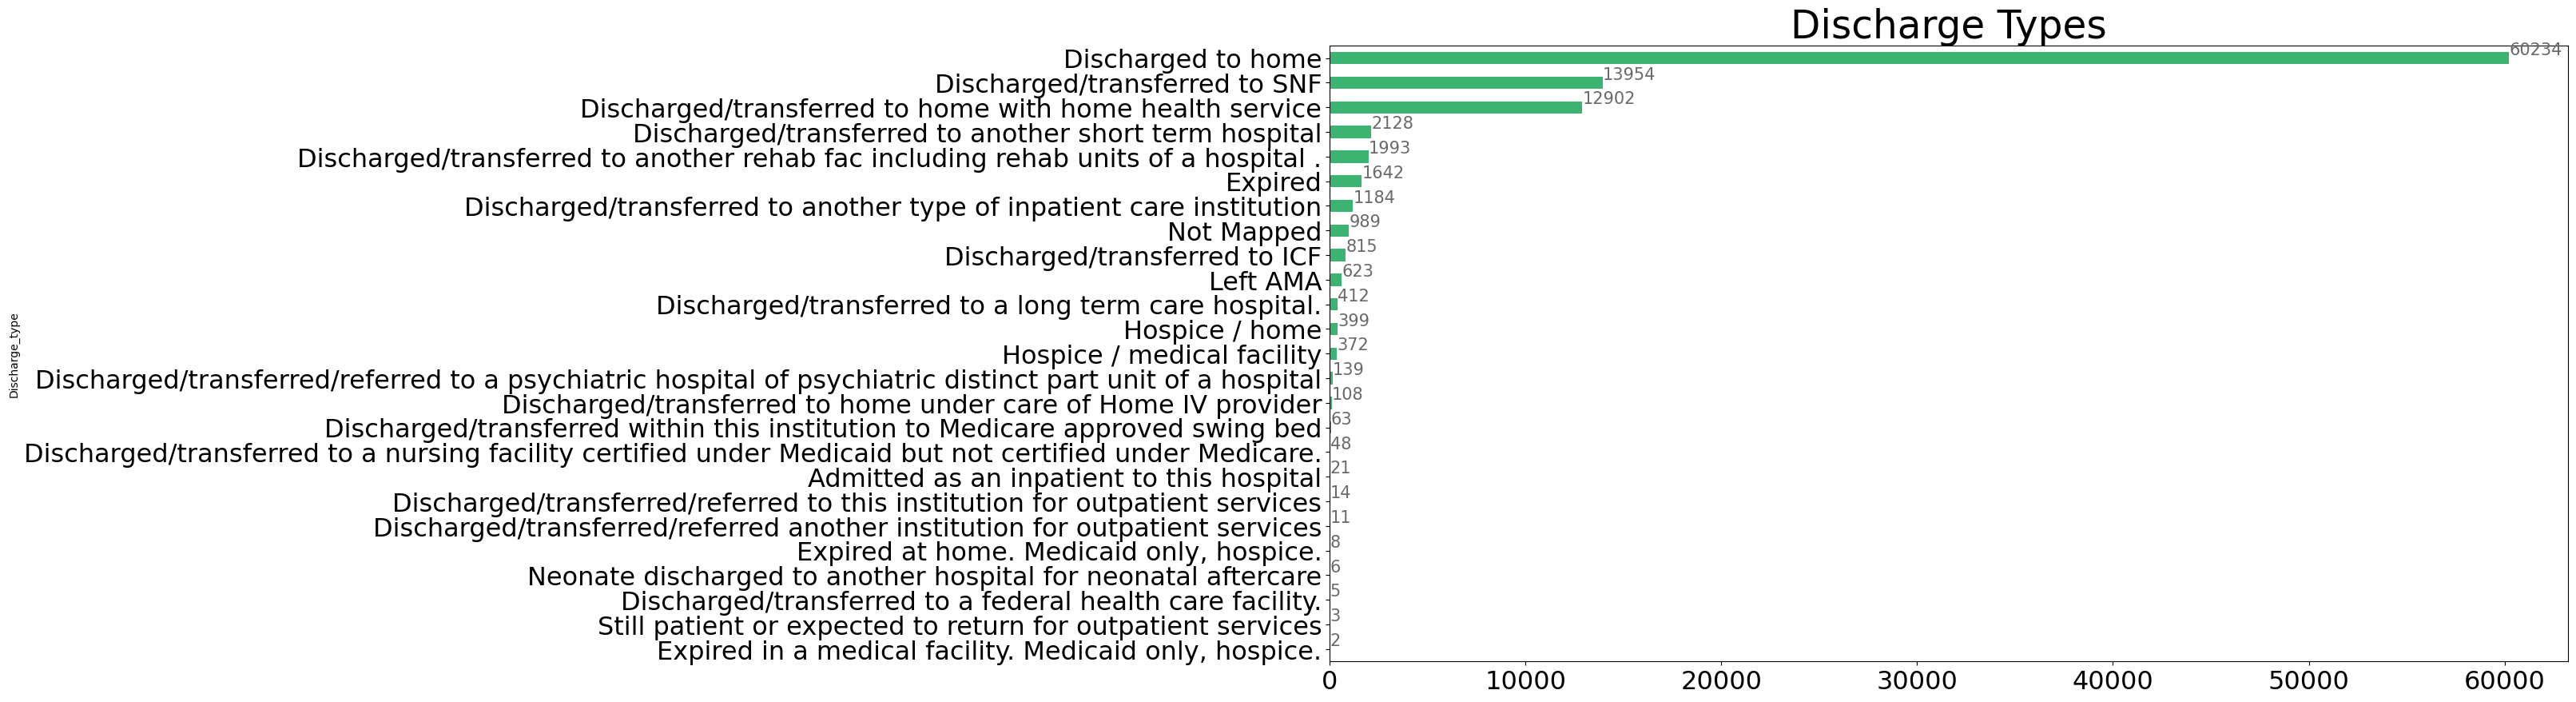

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the horizontal bar plot
ax = df['Discharge_type'].value_counts().plot.barh(
    figsize=(20,10),
    color='mediumseagreen',
    fontsize=23)

# Invert the y-axis
ax.invert_yaxis()

# Add counts on each bar
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.1, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
plt.title('Discharge Types', fontsize=35)
plt.show()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

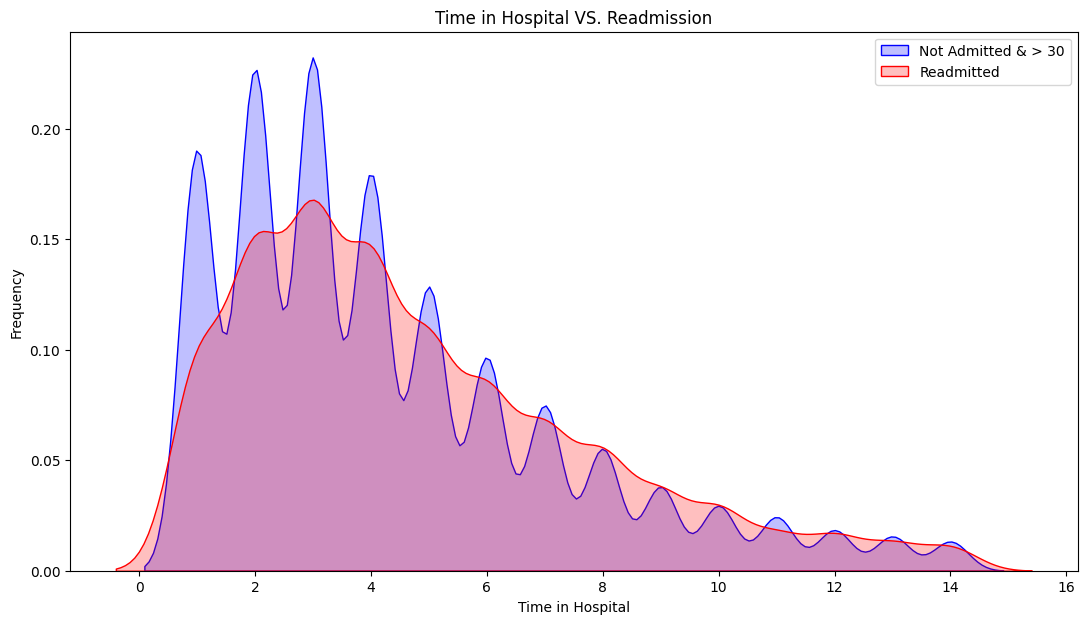

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted_class'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Admitted & > 30')
ax=sns.kdeplot(df.loc[(df['readmitted_class'] == 1),'time_in_hospital'] , color='r',shade=True, label= 'Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
ax.legend()
plt.title('Time in Hospital VS. Readmission')

The above KDE Plot graph shows that there is a positive correlation between the length of a patient's hospital stay and their risk of being readmitted. This means that patients who stay in the hospital for longer are more likely to be readmitted within 30 days.
* There are a number of possible explanations for this correlation. For example, patients who stay in the hospital for longer may have more complex medical conditions that make them more likely to be readmitted. Additionally, patients who stay in the hospital for longer may be more likely to experience complications during their stay, which could also lead to readmission.

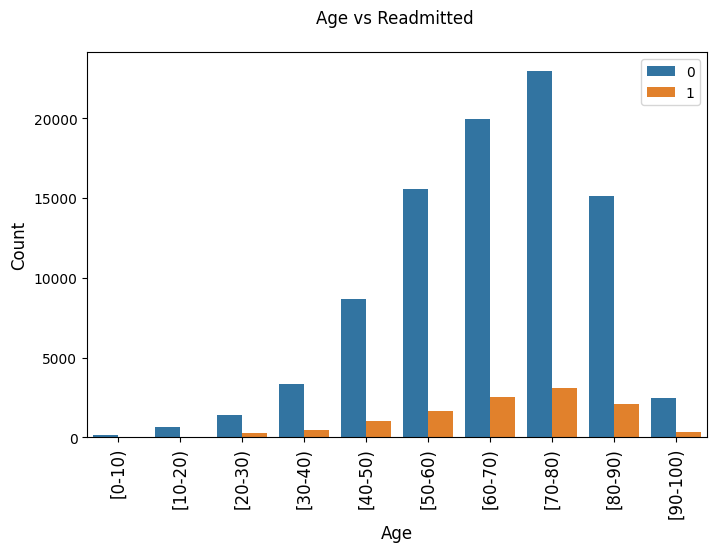

In [ ]:
# Assuming 'readmitted_class' is a categorical variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age', hue='readmitted_class')
plt.xlabel('Age', size=12)
plt.xticks(rotation=90, size=12)
plt.ylabel('Count', size=12)
plt.title('Age vs Readmitted \n', size=12)
plt.legend()
plt.show()

Most of the patients that have diabetes lie in the 50 to 90-year span.

## Dealing with missing values

In [ ]:
#total count of ? in data each column
missing_count = df.eq('?').sum()
missing_percent = round(df.eq('?').sum() * 100 / len(df), 2)
missing_data = pd.DataFrame(missing_count)
missing_data.columns = ["missing_count"]
missing_data['missing_percent']  = missing_percent
missing_data = missing_data.sort_values('missing_percent', ascending=False)
missing_data.head(10)

,missing_count,missing_percent
weight,98569,96.86
medical_specialty,49949,49.08
payer_code,40256,39.56
race,2273,2.23
diag_3,1423,1.40
diag_2,358,0.35
diag_1,21,0.02
citoglipton,0,0.00
examide,0,0.00
encounter_id,0,0.00


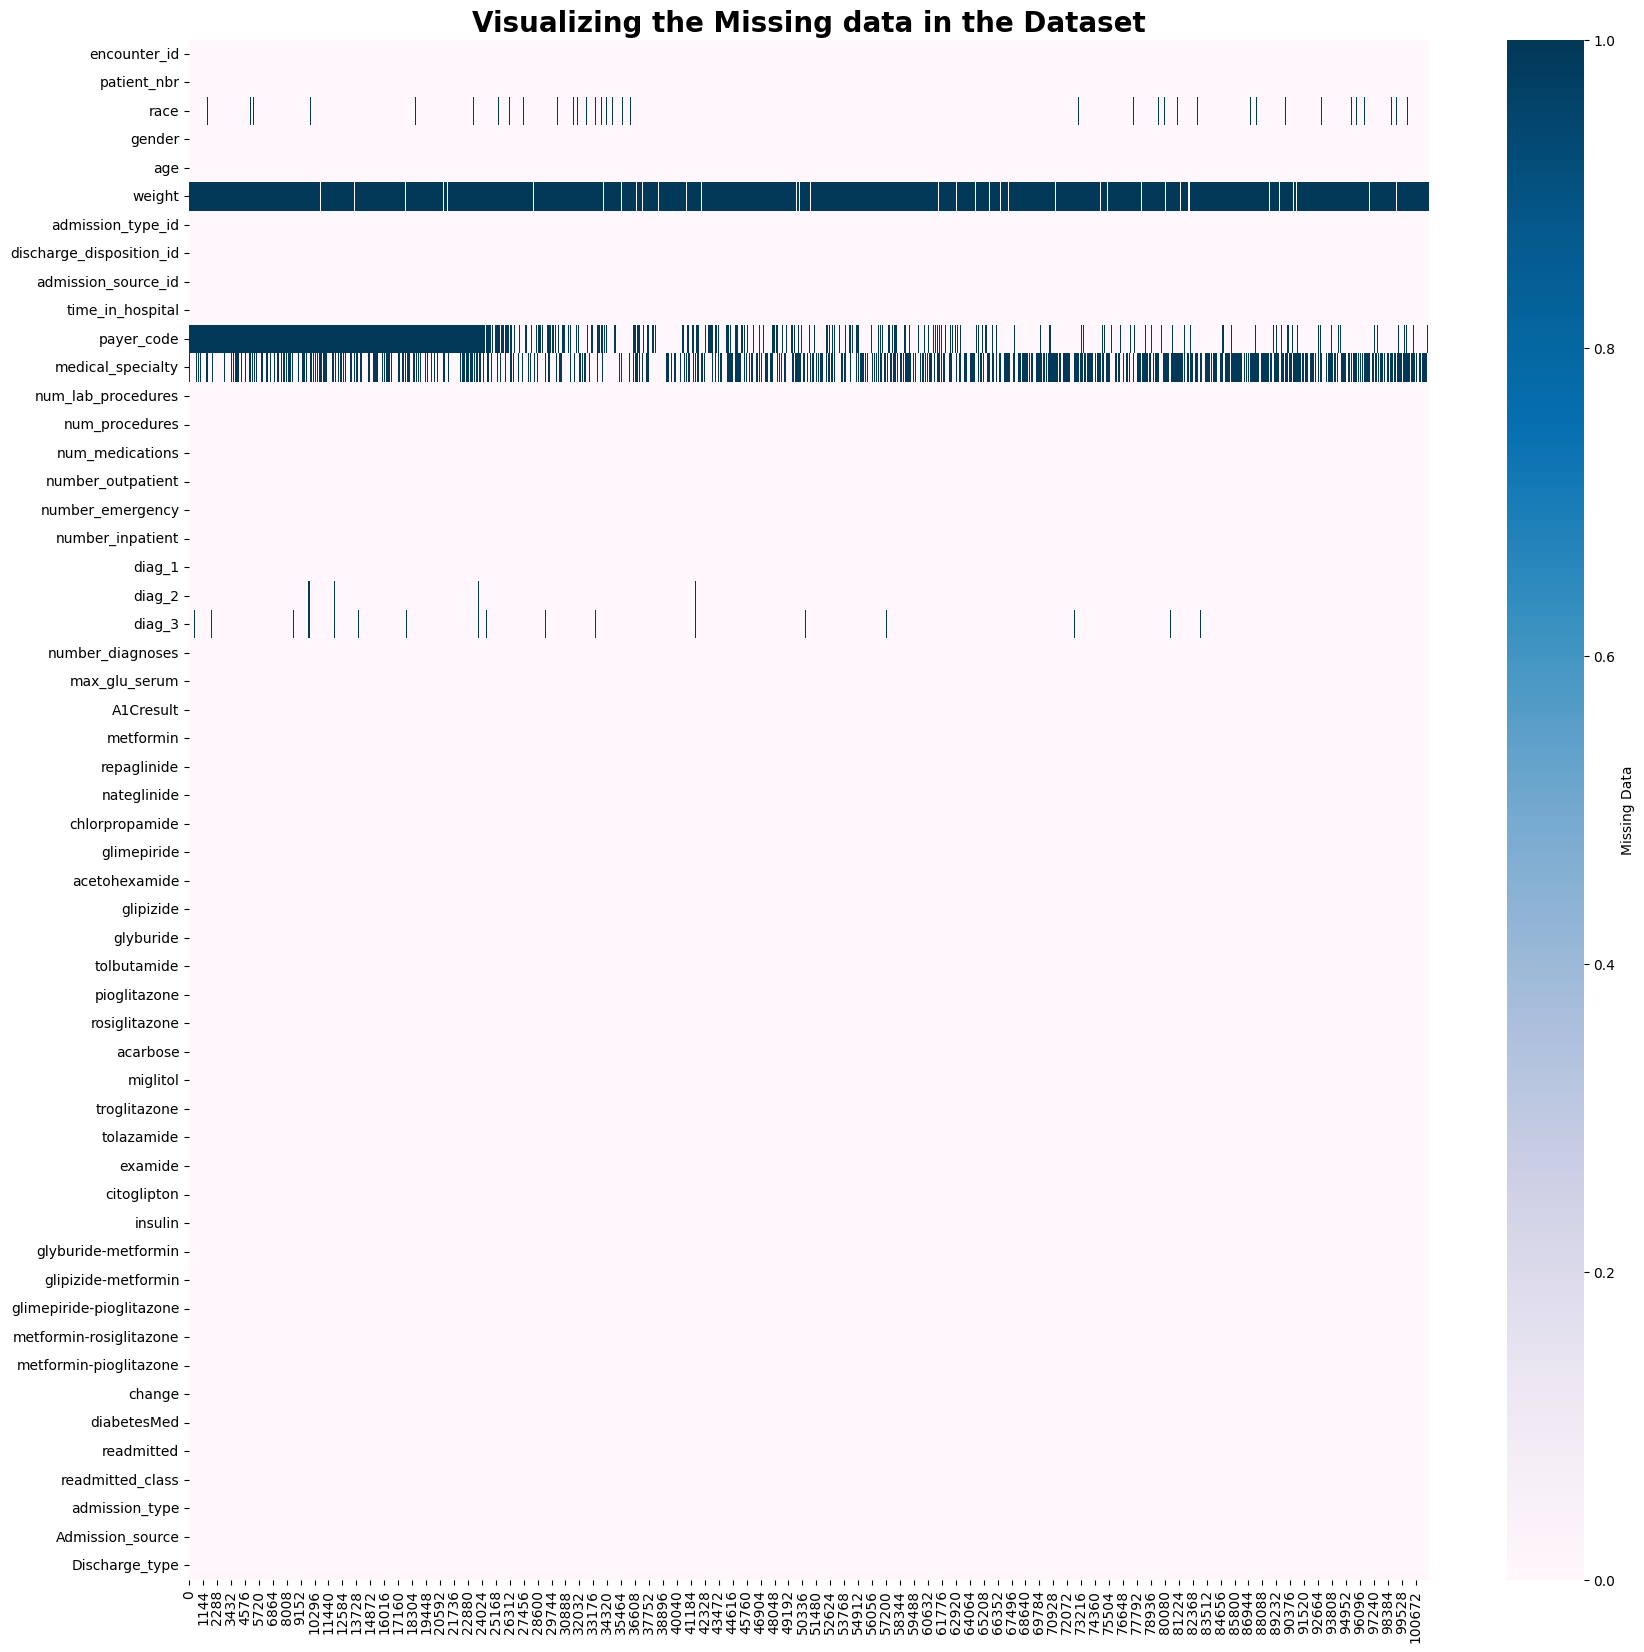

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.eq('?').transpose(),
            cmap = "PuBu",
            cbar_kws = {'label' : 'Missing Data'})
plt.title("Visualizing the Missing data in the Dataset",
          fontsize = 20, fontweight = "bold")
plt.show()

In [ ]:
unique_genders = df['gender'].unique()
print(unique_genders)

['Female' 'Male' 'Unknown/Invalid']


In [ ]:
# gender was coded differently so we use a custom count for this one
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [ ]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [ ]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

Since the variable 'weight' accounts for almost 97% of the missing values, we chose to eliminate this variable because there is no benefit to filling in the missing values. We also removed the variables 'Payer code' and 'medical_speciality' since they had roughly 40% and 50% missing entries, respectively. In comparison to other attributes we omitted, the variables 'race,' 'diag_1,' 'diag_2,' 'diag_3,' and 'gender' had comparatively few missing values. Therefore, we will drop the rows that have these values missing.

In [ ]:
#rename diag_1, diag_2, diag_3 columns as primary_diagnosis, secondary_diagnosis, additional_diagnosis
df.rename(columns = {'diag_1':'primary_diagnosis',
                     'diag_2':'secondary_diagnosis',
                     'diag_3':'additional_diagnosis'}, inplace = True)

In [ ]:
#Checking for missing values in the data
for col in df.columns:
  if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
primary_diagnosis 0
secondary_diagnosis 0
additional_diagnosis 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
admission_type 0
Admission_source 0
Discharge_type 0
gender 0


In [ ]:
print("Number of instances after dropping missing rows",df.shape[0])

Number of instances after dropping missing rows 98052


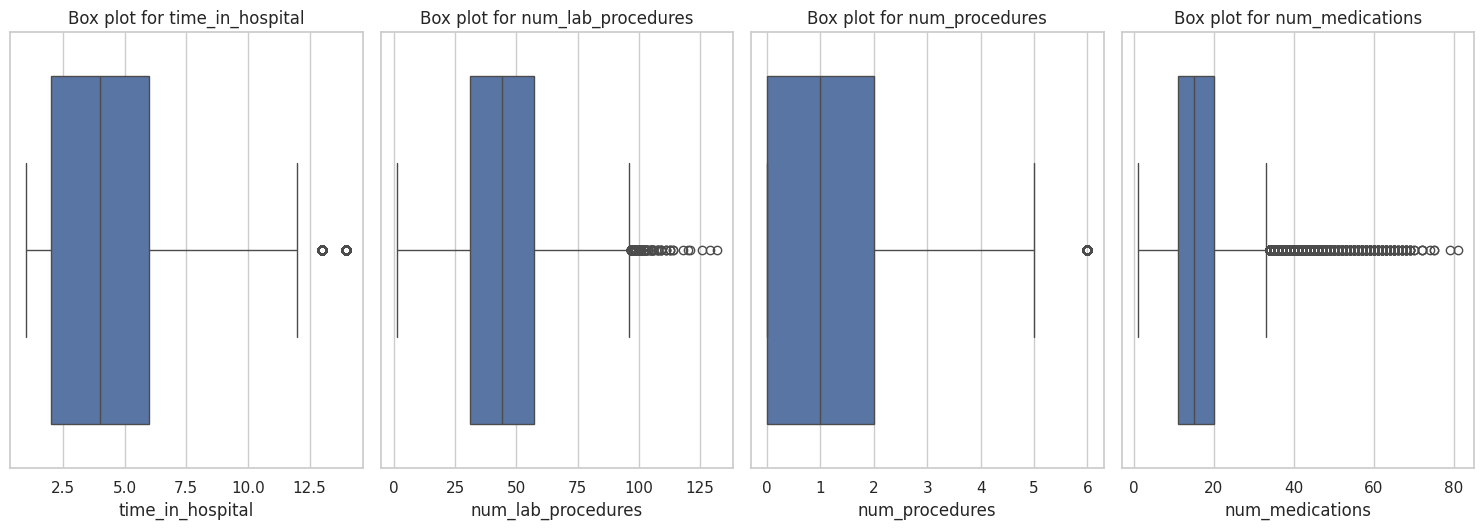

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']

# Create a grid of box plots
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Create a grid layout
grid_layout = (2, 4)  # 2 rows, 4 columns

# Loop through each variable and create a box plot in the grid
for i, variable in enumerate(variables, 1):
    plt.subplot(grid_layout[0], grid_layout[1], i)
    sns.boxplot(x=df[variable])
    plt.title(f'Box plot for {variable}')

plt.tight_layout()
plt.show()

**Time in hospital:**
* The distribution is skewed to the right, indicating that most patients have shorter stays, but some have much longer stays.
* The median time in hospital is around 4 days.
* There are some outliers, which could represent patients with complex medical conditions or complications.

**Number of lab procedures:**
* The distribution is roughly symmetrical, with most patients undergoing between 25 and 50 procedures.
* There are quite few outliers with a very high number of procedures.

**Number of procedures:**
* The distribution is skewed to the right, with most patients having few procedures but some having many.
* The median number of procedures is around 2.
* There are some outliers with a very high number of procedures.

**Number of medications:**
* The distribution is roughly symmetrical, with most patients taking between 20 and 40 medications.
* There are a few outliers taking many more medications.


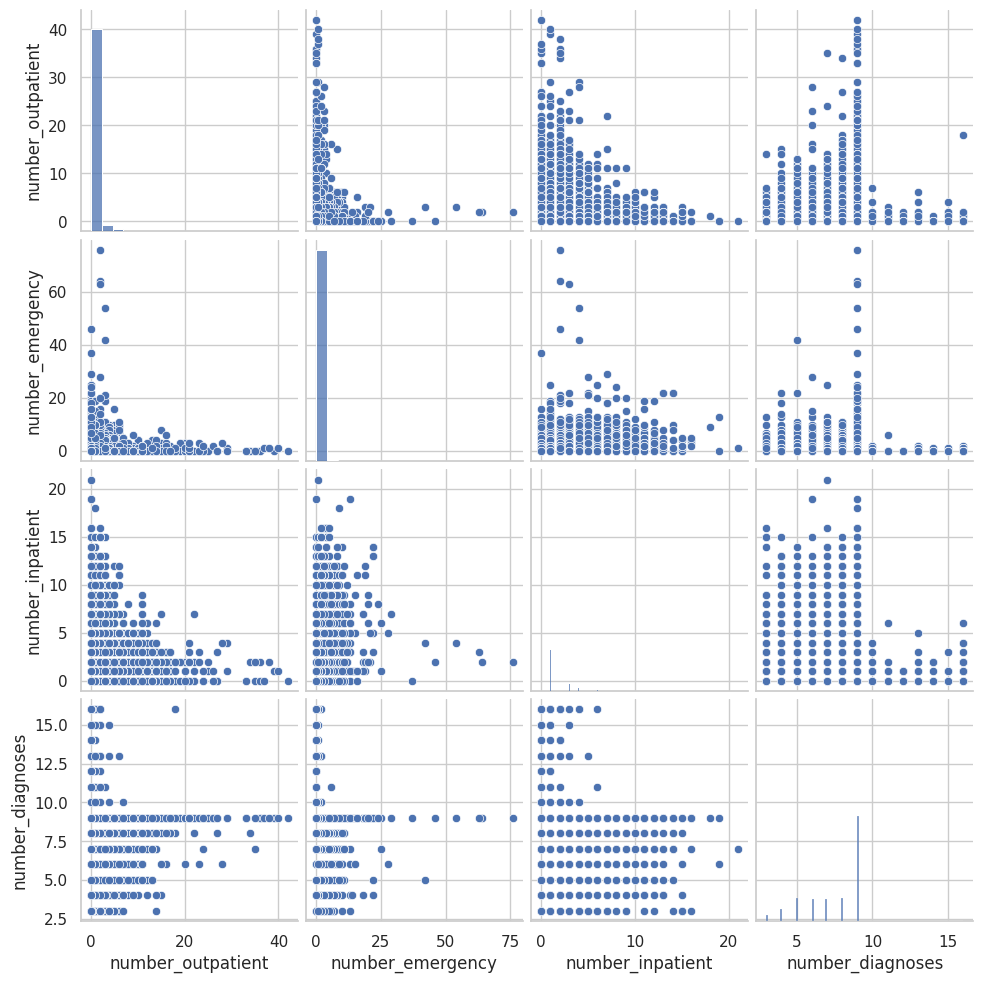

In [ ]:
sns.pairplot(df[['number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']])
plt.show()

* **Number of patients with emergency case vs number of outpatients:** There is a weak positive correlation between the number of patients with emergency cases and the number of outpatients. This means that as the number of outpatients increases, the number of patients with emergency cases also tends to increase, but not very strongly.
* **Number of patients with emergency cases vs number of inpatients:** There is a weak positive correlation between the number of patients with emergency cases and the number of inpatients. This means that as the number of inpatients increases, the number of patients with emergency calls also tends to increase, but not very strongly.
* **Number of patients with emergency calls vs number of diagnoses:** There is a weak positive correlation between the number of patients with emergency calls and the number of diagnoses. This means that as the number of diagnoses increases, the number of patients with emergency calls also tends to increase, but not very strongly.
* **Number of outpatients vs number of inpatients:** There is a weak positive correlation between the number of outpatients and the number of inpatients. This means that as the number of outpatients increases, the number of inpatients also tends to increase, but not very strongly.
* **Number of outpatients vs number of diagnoses:** There is a weak positive correlation between the number of outpatients and the number of diagnoses. This means that as the number of outpatients increases, the number of diagnoses also tends to increase, but not very strongly.
* **Number of inpatients vs number of diagnoses:** There is a weak positive correlation between the number of inpatients and the number of diagnoses. This means that as the number of inpatients increases, the number of diagnoses also tends to increase, but not very strongly.


## **DATA PROCESSING**

We have 24 features that showcase the medications given to the patient while being admitted in the hospital. It includes the medications given in the below table. These features indicate whether the drug was prescribed or there was a change in the dosage.

The values that they hold are “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed.


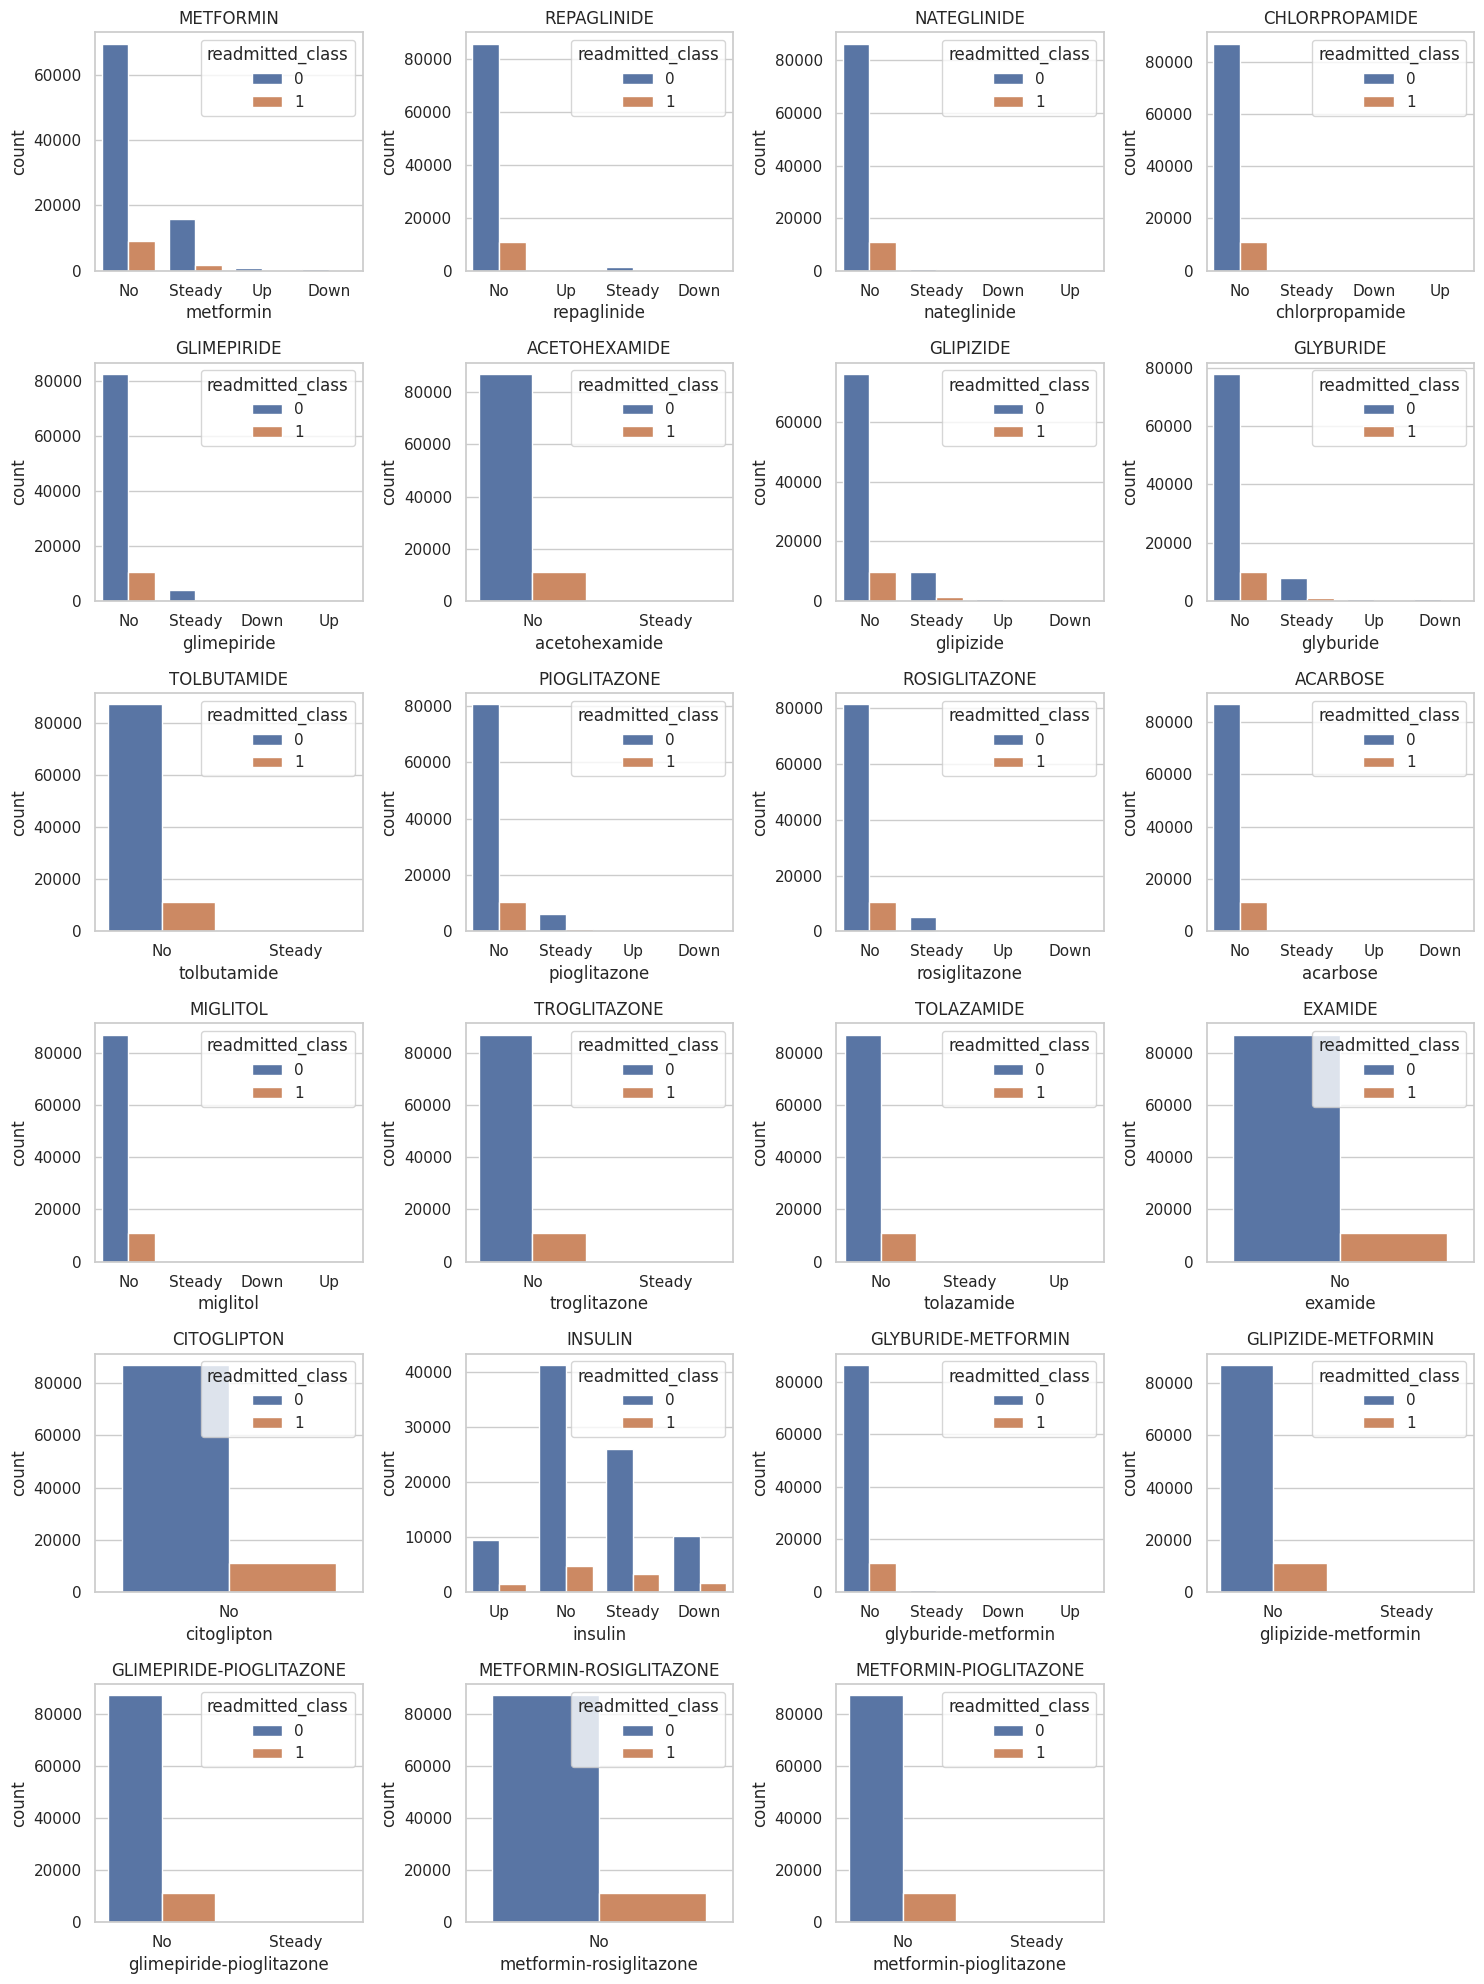

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 20))
for n, ticker in enumerate(df.columns[21:44]):
    ax = plt.subplot(6, 4, n + 1)
    ax = sns.countplot(x=ticker, hue='readmitted_class', data=df)
    ax.set_title(ticker.upper(), fontsize=12)
    plt.tight_layout()

plt.show()

The variables (drugs named citoglipton and examide'acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide','glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone') , all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop all these variables

In [ ]:
df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

**DATA ENCODING**

Since we are dealing with categorical columns in our dataset, we map these unique values into numerical values as few Machine Learning models can only deal with numeric data. All of the categorical columns present in our dataset have ordinal categories i.e., they do not have any particular order.

In [ ]:
categorical_features =['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id' , 'admission_source_id',
                       'primary_diagnosis', 'secondary_diagnosis', 'number_diagnoses',
                       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
                       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
                       'glyburide-metformin', 'change', 'diabetesMed']

In [ ]:
df_en = df.copy()

In [ ]:
#convert categorical features using label encoder
for feature in categorical_features:
    le = LabelEncoder()
    df_en[feature] = le.fit_transform(df_en[feature])

In [ ]:
df_en.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted,readmitted_class,admission_type,Admission_source,Discharge_type
1,149190,55629189,2,0,1,0,0,14,3,59,...,1,3,1,0,1,>30,0,Emergency,Emergency Room,Discharged to home
2,64410,86047875,0,0,2,0,0,14,2,11,...,1,1,1,1,1,NO,0,Emergency,Emergency Room,Discharged to home
3,500364,82442376,2,1,3,0,0,14,2,44,...,1,3,1,0,1,NO,0,Emergency,Emergency Room,Discharged to home
4,16680,42519267,2,1,4,0,0,14,1,51,...,1,2,1,0,1,NO,0,Emergency,Emergency Room,Discharged to home
5,35754,82637451,2,1,5,1,0,6,3,31,...,1,2,1,1,1,>30,0,Urgent,Clinic Referral,Discharged to home


In [ ]:
#drop admission_type column (this was created to map categories, not required during model building)
df_en.drop('admission_type',axis=1,inplace=True)
#drop readmitted column
df_en.drop('readmitted',axis=1,inplace=True)

#drop encounter_id column and patient_nbr column (as they are just index columns and should not affect the analysis)
df_en.drop('encounter_id',axis=1,inplace=True)
df_en.drop('patient_nbr',axis=1,inplace=True)

In [ ]:
df_en

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_class,Admission_source,Discharge_type
1,2,0,1,0,0,14,3,59,0,18,...,1,1,1,3,1,0,1,0,Emergency Room,Discharged to home
2,0,0,2,0,0,14,2,11,5,13,...,1,1,1,1,1,1,1,0,Emergency Room,Discharged to home
3,2,1,3,0,0,14,2,44,1,16,...,1,1,1,3,1,0,1,0,Emergency Room,Discharged to home
4,2,1,4,0,0,14,1,51,0,8,...,1,1,1,2,1,0,1,0,Emergency Room,Discharged to home
5,2,1,5,1,0,6,3,31,6,16,...,1,1,1,2,1,1,1,0,Clinic Referral,Discharged to home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,0,19,14,3,51,0,16,...,1,1,1,0,1,0,1,0,Emergency Room,Discharged/transferred to SNF
101762,0,0,8,0,20,12,5,33,3,18,...,1,1,1,2,1,1,1,0,Transfer from a Skilled Nursing Facility (SNF),Discharged/transferred to ICF
101763,2,1,7,0,0,14,1,53,0,9,...,1,1,1,0,1,0,1,0,Emergency Room,Discharged to home
101764,2,0,8,1,19,14,10,45,2,21,...,1,1,1,3,1,0,1,0,Emergency Room,Discharged/transferred to SNF


## **CORRELATION ANALYSIS**

Correlation analysis is performed as part of dimension reduction, where we calculate the correlation between every 2 numerical columns using Pearson’s coefficient. Pearson’s correlation coefficient is a bivariate correlation that measures the linear correlation between two sets of data, whose value ranges from -1 to 1. Essentially, it is a normalized measurement of their covariances. If a pair of variables are highly correlated (for example, setting 0.8 as the cutoff for highly correlated variables), then we drop one of the column-pair.

In [ ]:
#correlation between numerical features
df_corr = df_en[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].corr()
df_corr

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318632,0.191164,0.464212,-0.010913,-0.010508,0.072282,0.211225
num_lab_procedures,0.318632,1.000000,0.058710,0.267863,-0.008625,-0.002142,0.039198,0.150257
num_procedures,0.191164,0.058710,1.000000,0.382952,-0.026453,-0.038723,-0.067535,0.058973
num_medications,0.464212,0.267863,0.382952,1.000000,0.042652,0.012127,0.062905,0.241501
number_outpatient,-0.010913,-0.008625,-0.026453,0.042652,1.000000,0.091033,0.105979,0.091414
number_emergency,-0.010508,-0.002142,-0.038723,0.012127,0.091033,1.000000,0.267174,0.054616
number_inpatient,0.072282,0.039198,-0.067535,0.062905,0.105979,0.267174,1.000000,0.101244
number_diagnoses,0.211225,0.150257,0.058973,0.241501,0.091414,0.054616,0.101244,1.000000


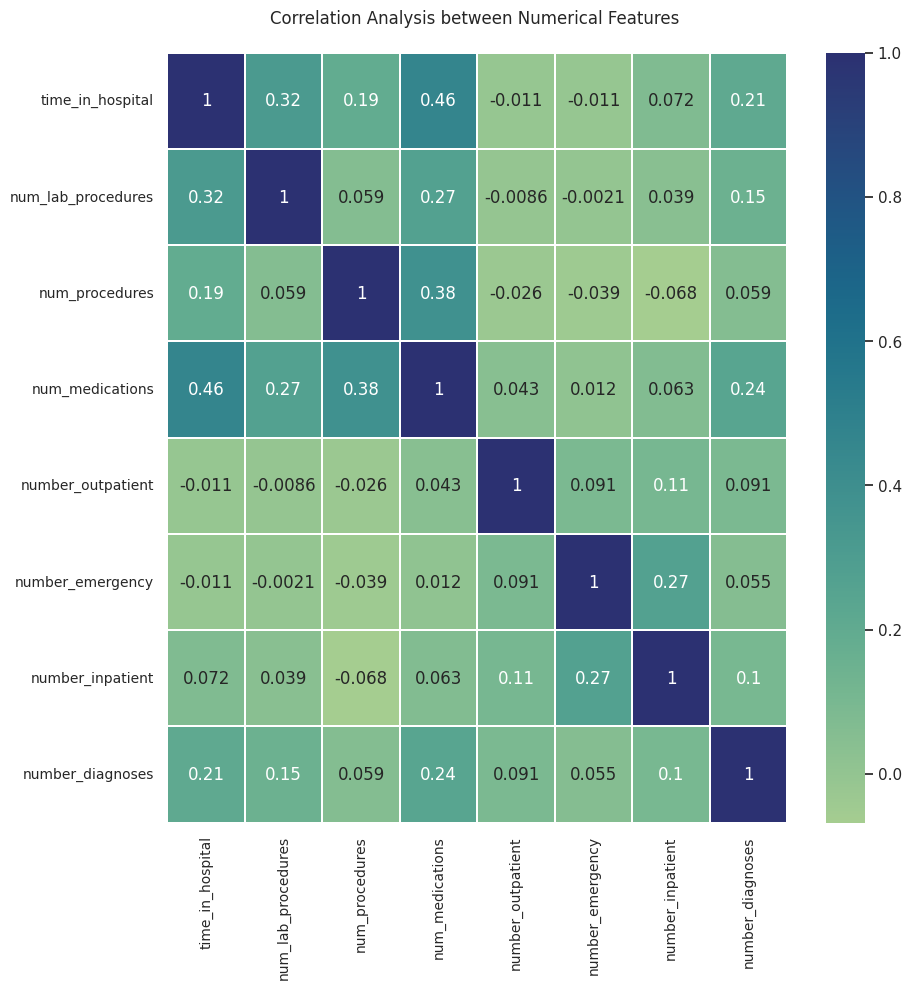

In [ ]:
#generate a heat map to show correlation between numerical features
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='crest',linewidths=0.1)
fig=plt.gcf()
plt.title("Correlation Analysis between Numerical Features \n")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#drop additional diagnosis column
df_en.drop('additional_diagnosis',axis=1,inplace=True)

## **FEATURE ENGINEERING**


This methodology is used to extract or derive new features from existing data using domain knowledge. Here, we have used this technique to come up with new columns that includes:

Total hospital visits = number of outpatient visits + number of emergency visits + number of inpatient visits

Total medications = number of medications given + number of diagnoses

Total procedures completed = number of lab procedures + number of other procedures

Total diagnoses = number of diagnoses + number of inpatient visits

In [ ]:
#perform feature engineering on df_en
df_en['total_visits'] = df_en['number_outpatient'] + df_en['number_emergency'] + df_en['number_inpatient']
df_en['total_medications'] = df_en['num_medications'] + df_en['number_diagnoses']
df_en['total_procedures'] = df_en['num_procedures'] + df_en['num_lab_procedures']
df_en['total_diagnoses'] = df_en['number_diagnoses'] + df_en['number_inpatient']

In [ ]:
df_en[['total_visits', 'total_medications', 'total_procedures', 'total_diagnoses']].head()

,total_visits,total_medications,total_procedures,total_diagnoses
1,0,24,59,6
2,3,16,16,4
3,0,20,45,4
4,0,10,51,2
5,0,22,37,6


In [ ]:
#drop the columns that are no longer needed
df_en.drop('number_outpatient',axis=1,inplace=True)
df_en.drop('number_emergency',axis=1,inplace=True)
df_en.drop('number_inpatient',axis=1,inplace=True)
df_en.drop('num_medications',axis=1,inplace=True)
df_en.drop('num_procedures',axis=1,inplace=True)
df_en.drop('num_lab_procedures',axis=1,inplace=True)
df_en.drop('number_diagnoses',axis=1,inplace=True)
df_en.drop(columns={'Admission_source','Discharge_type'},inplace=True)

In [ ]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      98052 non-null  int64
 1   gender                    98052 non-null  int64
 2   age                       98052 non-null  int64
 3   admission_type_id         98052 non-null  int64
 4   discharge_disposition_id  98052 non-null  int64
 5   admission_source_id       98052 non-null  int64
 6   time_in_hospital          98052 non-null  int64
 7   primary_diagnosis         98052 non-null  int64
 8   secondary_diagnosis       98052 non-null  int64
 9   max_glu_serum             98052 non-null  int64
 10  A1Cresult                 98052 non-null  int64
 11  metformin                 98052 non-null  int64
 12  repaglinide               98052 non-null  int64
 13  nateglinide               98052 non-null  int64
 14  chlorpropamide            98052 non-null  

In [ ]:
for column in df_en.columns:
    if df_en[column].dtype != 'object':
        df_en[column] = df_en[column].astype('float64')

## **DATA SCALING/ NORMALIZATION**

The goal of this step is to bring all the features to a similar scale. This is an important step since it ensures equal consideration of all the features, thus improving the numerical stability of our model. It may also speed up the training process. We use sklearn's normalize function to scale our dataset.


In [ ]:
#normalize the numerical features
df_en[['time_in_hospital', 'total_visits',
     'total_medications', 'total_procedures',
     'total_diagnoses']] = preprocessing.normalize(df_en[['time_in_hospital', 'total_visits',
                                                        'total_medications', 'total_procedures',
                                                        'total_diagnoses']])
df_en.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,primary_diagnosis,secondary_diagnosis,max_glu_serum,...,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_class,total_visits,total_medications,total_procedures,total_diagnoses
1,2.0,0.0,1.0,0.0,0.0,14.0,0.046841,143.0,77.0,3.0,...,1.0,3.0,1.0,0.0,1.0,0.0,0.00000,0.374726,0.921201,0.093681
2,0.0,0.0,2.0,0.0,0.0,14.0,0.085987,454.0,76.0,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.12898,0.687894,0.687894,0.171973
3,2.0,1.0,3.0,0.0,0.0,14.0,0.040447,553.0,95.0,3.0,...,1.0,3.0,1.0,0.0,1.0,0.0,0.00000,0.404474,0.910066,0.080895
4,2.0,1.0,4.0,0.0,0.0,14.0,0.019224,54.0,23.0,3.0,...,1.0,2.0,1.0,0.0,1.0,0.0,0.00000,0.192237,0.980407,0.038447
5,2.0,1.0,5.0,1.0,0.0,6.0,0.068861,263.0,244.0,3.0,...,1.0,2.0,1.0,1.0,1.0,0.0,0.00000,0.504980,0.849285,0.137722


## **DATA PARTITIONING AND MODELING**

Data partitioning or data splitting is the process of dividing the dataset into 2 or more parts, typically to train the model on one part and validate on the other. This step is performed to avoid overfitting. Data should be split in a way that we have more data for the training purpose. This step is performed to avoid overfitting. Data should be split in a way that we have more data for the training purpose. Since we have a medium sized dataset, hence we split it into train and test. In this case, we have performed an 80-20 split for creating train and test sets.



In [ ]:
df2 = df_en.copy()

In [ ]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,primary_diagnosis,secondary_diagnosis,max_glu_serum,...,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_class,total_visits,total_medications,total_procedures,total_diagnoses
1,2.0,0.0,1.0,0.0,0.0,14.0,0.046841,143.0,77.0,3.0,...,1.0,3.0,1.0,0.0,1.0,0.0,0.00000,0.374726,0.921201,0.093681
2,0.0,0.0,2.0,0.0,0.0,14.0,0.085987,454.0,76.0,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.12898,0.687894,0.687894,0.171973
3,2.0,1.0,3.0,0.0,0.0,14.0,0.040447,553.0,95.0,3.0,...,1.0,3.0,1.0,0.0,1.0,0.0,0.00000,0.404474,0.910066,0.080895
4,2.0,1.0,4.0,0.0,0.0,14.0,0.019224,54.0,23.0,3.0,...,1.0,2.0,1.0,0.0,1.0,0.0,0.00000,0.192237,0.980407,0.038447
5,2.0,1.0,5.0,1.0,0.0,6.0,0.068861,263.0,244.0,3.0,...,1.0,2.0,1.0,1.0,1.0,0.0,0.00000,0.504980,0.849285,0.137722


## LOGISTIC REGRESSION

We chose logistic regression model as the baseline model because it is advantageous due to its simplicity, interpretability, efficiency, and robustness. Logistic regression provides a straightforward approach for modeling binary or multi-class outcomes based on input features, allowing for easy interpretation of coefficients and predictions. It serves as a benchmark for evaluating the performance of more complex models and is suitable for handling large datasets and high-dimensional data. Additionally, logistic regression has fewer assumptions compared to some other algorithms, making it versatile and robust to noise in the data. Overall, logistic regression serves as a reliable starting point in model development and can provide valuable insights into the relationships between predictors and outcomes in classification tasks.

In [ ]:
#taking value counts
df2['readmitted_class'].value_counts()

readmitted_class
0.0    86986
1.0    11066
Name: count, dtype: int64

In [ ]:
#creating two groups of datasets where X contains all columns except the response variable and y contains only the response variable
X = df2.drop('readmitted_class',axis=1)
y = df2['readmitted_class']

In [ ]:
# !pip install imblearn

# !pip install scikit-learn==1.3.0

# !pip install --upgrade scikit-learn imbalanced-learn


In [ ]:
#Split the data into training and testing data and train the model

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted_class==0]
readmitted = X[X.readmitted_class==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False,
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted_class.value_counts()

y_train = downsampled.readmitted_class
X_train = downsampled.drop('readmitted_class', axis=1)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.62      0.74     17488
         1.0       0.15      0.53      0.23      2123

    accuracy                           0.61     19611
   macro avg       0.53      0.58      0.48     19611
weighted avg       0.83      0.61      0.68     19611



In [ ]:
#Calculating the accuracy, precision and recall for Logistic regression model

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

accuracy_logit = accuracy_score(y_test, y_pred)
precision_logit = precision_score(y_test, y_pred)
recall_logit = recall_score(y_test, y_pred)

Accuracy is 0.61
Precision is 0.15
Recall is 0.53


In [ ]:
# !pip install --upgrade --force-reinstall scikit-learn
# !pip install --force-reinstall imbalanced-learn

Accuracy: 0.6111875987965938
ROC AUC: 0.5763101696489328
Confusion matrix:
 [[10857  6631]
 [  994  1129]]


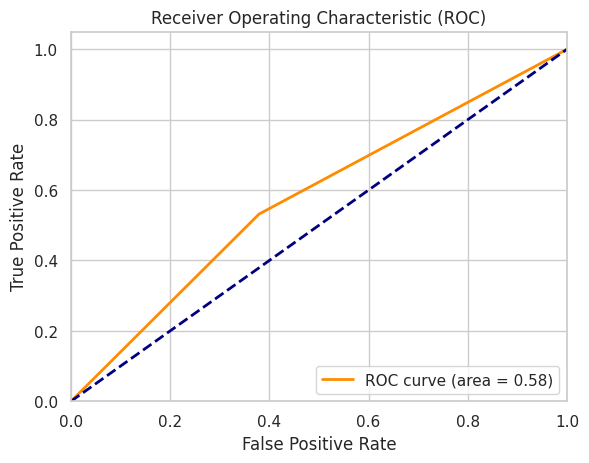

In [ ]:
#Plotting the ROC graph

import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred.round())

print("Accuracy:", accuracy_score(y_test,y_pred))
print("ROC AUC:", roc_auc)
print("Confusion matrix:\n", conf_matrix_lr)

# If you want to plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## DECISION TREE ALGORITHM

Decision Trees are powerful non-linear models that recursively partition the dataset based on feature values to create a tree-like structure. Each internal node represents a decision based on a feature, and each leaf node represents a class label, making it an intuitive model for capturing complex decision rules. Decision Trees are particularly well-suited for classification problems because they can handle both categorical and numerical features and can capture non-linear relationships between features and the target variable. Additionally, Decision Trees inherently perform feature selection by identifying the most informative features for classification. This makes them effective for problems with high-dimensional data or datasets containing irrelevant features. Furthermore, Decision Trees can provide interpretable decision paths, making them valuable for understanding how the model makes predictions. Overall, the versatility, interpretability, and ability to capture complex decision rules make the Decision Tree algorithm well-suited for classification problems.

In [ ]:
#split the data into train and test
X = df2.drop('readmitted_class',axis=1)
y = df2['readmitted_class']

In [ ]:
X.shape

(98052, 30)

In [ ]:
df2['readmitted_class'].value_counts()

readmitted_class
0.0    86986
1.0    11066
Name: count, dtype: int64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#downsampling the model

from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted_class==0]
readmitted = X[X.readmitted_class==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False,
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted_class.value_counts()

y_train = downsampled.readmitted_class
X_train = downsampled.drop('readmitted_class', axis=1)

In [ ]:
#training the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [ ]:
#calculating confusion matrix

dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0.0,1.0,All
Actual,,,
0.0,1830,1477,3307
1.0,231,198,429
All,2061,1675,3736


In [ ]:
# Calculating Acuuracy, Precision and Recall

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.56
Precision is 0.13
Recall is 0.55


ROC AUC: 0.5553942729155991


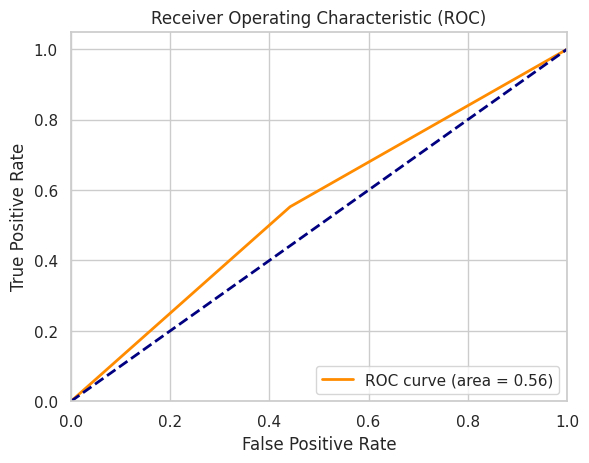

In [ ]:
#Plotting the ROC curve

fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, dtree_pred)
roc_auc = roc_auc_score(y_test, dtree_pred)

print("ROC AUC:", roc_auc)

# If you want to plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_dtree, tpr_dtree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

                     Feature  Importance
3          admission_type_id    0.024952
4   discharge_disposition_id    0.042852
2                        age    0.042919
26              total_visits    0.084922
28          total_procedures    0.091897
27         total_medications    0.095883
8        secondary_diagnosis    0.097114
7          primary_diagnosis    0.100103
29           total_diagnoses    0.123307
6           time_in_hospital    0.139472


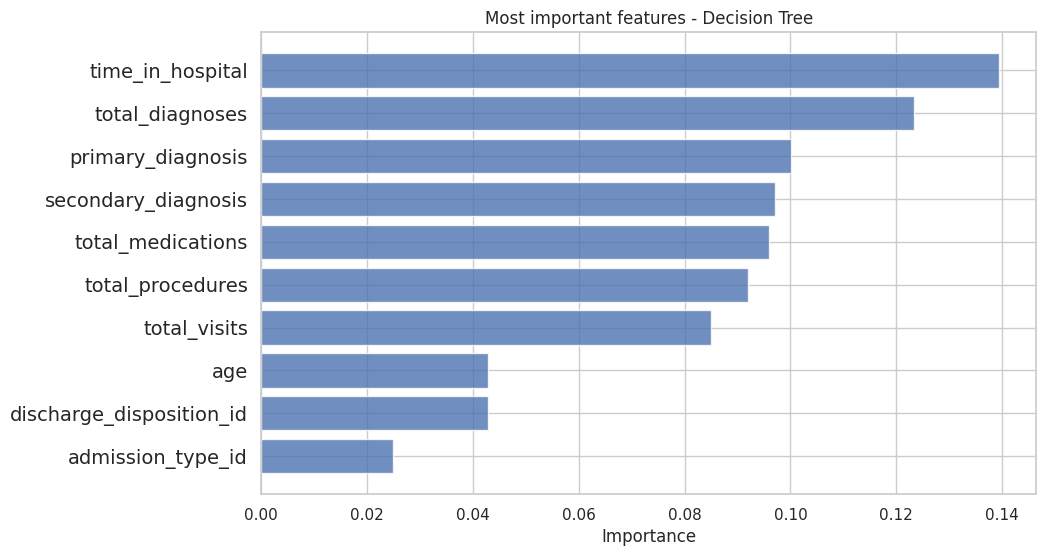

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

## RANDOM FOREST ALGORITHM

The Random Forest algorithm is a powerful ensemble model composed of multiple Decision Trees. It effectively addresses overfitting by aggregating predictions from individual trees, leading to improved generalization performance. For classification problems, the Random Forest algorithm is particularly advantageous due to its ability to handle high-dimensional data and capture complex decision boundaries. By aggregating insights from a diverse set of decision trees, the Random Forest algorithm enhances model robustness and reduces the risk of overfitting. In the context of predicting readmission within 30 days, the Random Forest algorithm leverages the collective wisdom of multiple trees to provide more accurate and reliable predictions. Its ability to handle both categorical and numerical features, perform automatic feature selection, and provide interpretable results makes it a well-suited choice for classification tasks, offering a balance between performance and interpretability.

In [ ]:
#Partitioning and splitting the data and performing downsampling

X = df2.drop('readmitted_class',axis=1)
y = df2['readmitted_class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted_class==0]
readmitted = X[X.readmitted_class==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False,
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted_class.value_counts()

y_train = downsampled.readmitted_class
X_train = downsampled.drop('readmitted_class', axis=1)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
# rm.fit(X_train_oversampled, y_train_oversampled)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest classifier with balanced class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.61      0.74     17488
         1.0       0.15      0.58      0.24      2123

    accuracy                           0.61     19611
   macro avg       0.54      0.60      0.49     19611
weighted avg       0.84      0.61      0.68     19611



In [ ]:
y_pred_rf = rf.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred_rf, name = 'Predict'), margins = True)

Predict,0.0,1.0,All
Actual,,,
0.0,1964,1343,3307
1.0,246,183,429
All,2210,1526,3736


In [ ]:
#Calculating Acuuract, Precision and Recall

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_rf)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_rf)))

accuracy_rm = accuracy_score(y_test, y_pred_rf)
precision_rm = precision_score(y_test, y_pred_rf)
recall_rm = recall_score(y_test, y_pred_rf)

Accuracy is 0.61
Precision is 0.15
Recall is 0.58


ROC AUC: 0.596799624984755


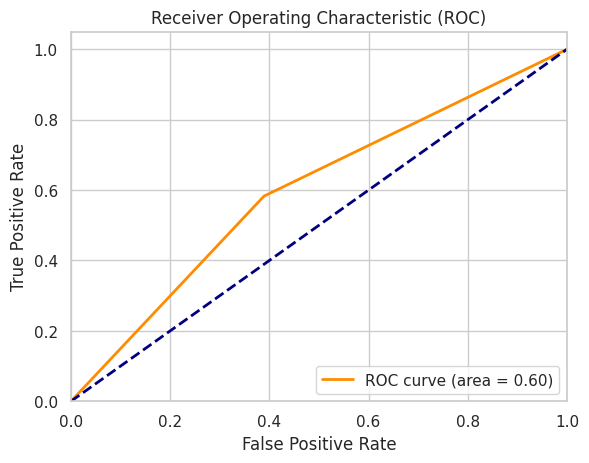

In [ ]:
#Plotting the ROC Curve

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

print("ROC AUC:", roc_auc)

# If you want to plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

                     Feature  Importance
22                   insulin    0.027422
4   discharge_disposition_id    0.043317
2                        age    0.047987
26              total_visits    0.081777
8        secondary_diagnosis    0.090888
7          primary_diagnosis    0.091076
28          total_procedures    0.100913
27         total_medications    0.102072
6           time_in_hospital    0.105358
29           total_diagnoses    0.110590


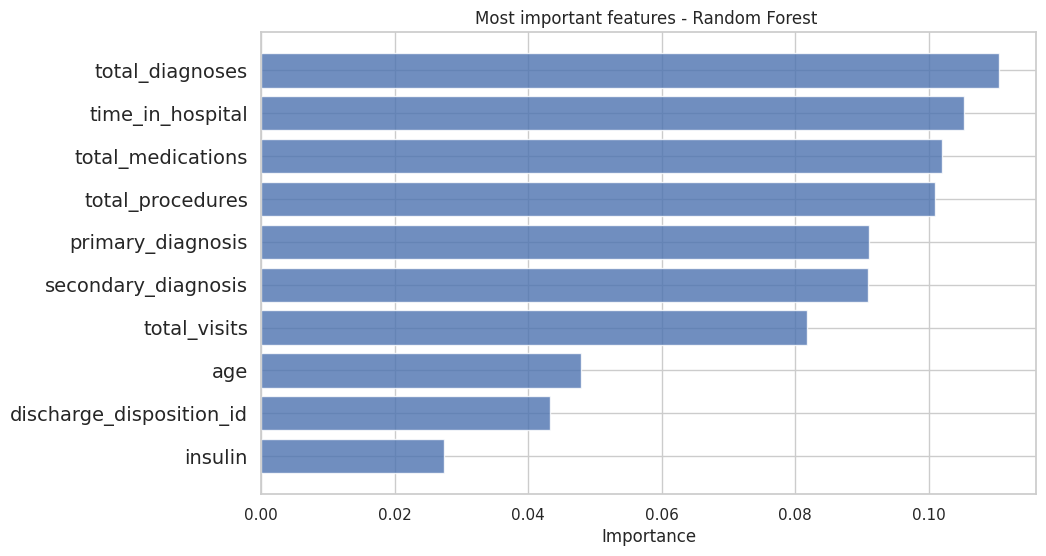

In [ ]:
# Create list of top most features based on importance

feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
print(most_imp_features)
plt.show()

According to the comparison, we need the percentages of true positives to be higher. In the Decision Tree Algorithms, Recall % is the highest that means the ability of the model to predict true postives is higher so we choose the deicison tree algorithm

## Support Vector Machine

Support Vector Machines are powerful models that aim to find a hyperplane to separate different
classes. They can handle non-linear relationships using kernel functions. In predicting diabetesrelated readmission, SVMs seek to identify a decision boundary that maximizes the margin
between patients who are readmitted and those who are not within the 30-day window.

In [ ]:
df3 = df2.sample(n = 500)

In [ ]:
#split the data into train and test
X = df3.drop('readmitted_class',axis=1)
y = df3['readmitted_class']

In [ ]:
X.shape

(500, 30)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted_class==0]
readmitted = X[X.readmitted_class==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False,
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted_class.value_counts()

y_train = downsampled.readmitted_class
X_train = downsampled.drop('readmitted_class', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score

# Train an SVM classifier
svm_clf = SVC(kernel='linear', probability=True)  # You can choose different kernels and parameters as needed
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)
y_prob = svm_clf.predict_proba(X_test)[:, 1]

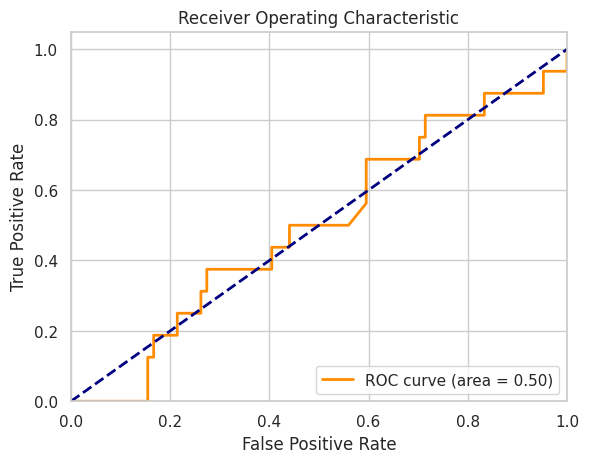

Precision: 0.16666666666666666
Recall: 0.5
Accuracy: 0.52
Confusion Matrix:
 [[44 40]
 [ 8  8]]


In [ ]:
# Calculate ROC curve and AUC
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_svm, tpr_svm)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate precision, recall, and other metrics
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred.round())

# Print the metrics
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

## Neural Networks Algorithm

Neural Networks are a class of models inspired by the structure of the human brain. They comprise interconnected nodes organized into layers, enabling them to learn complex patterns in data. For classification problems, Neural Networks offer several advantages. Firstly, they can capture intricate relationships between various factors in the data, allowing them to effectively model non-linear decision boundaries. This makes them well-suited for tasks where the relationship between input features and the target variable is complex and non-linear, such as predicting diabetes-related readmission within 30 days. Additionally, Neural Networks are highly flexible and can handle high-dimensional data with ease, making them suitable for datasets containing a large number of features. Furthermore, their ability to automatically learn and adapt to the underlying structure of the data makes them powerful tools for classification tasks, as they can uncover hidden patterns and relationships that may not be apparent through traditional methods. Overall, Neural Networks are well-suited for classification problems due to their capacity to model complex relationships and adaptability to various types of data.

In [ ]:
# df4 = df2.sample(n = 10000)

In [ ]:
#split the data into train and test
X = df2.drop('readmitted_class',axis=1)
y = df2['readmitted_class']

In [ ]:
X.shape

(98052, 30)

In [ ]:
df2['readmitted_class'].value_counts()

readmitted_class
0.0    86986
1.0    11066
Name: count, dtype: int64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted_class==0]
readmitted = X[X.readmitted_class==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False,
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted_class.value_counts()

y_train = downsampled.readmitted_class
X_train = downsampled.drop('readmitted_class', axis=1)

In [ ]:
#training the data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
448/448 [==============================] - 3s 5ms/step - loss: 1.1179 - accuracy: 0.5610 - val_loss: 0.3574 - val_accuracy: 0.9570
Epoch 2/200
448/448 [==============================] - 1s 3ms/step - loss: 0.8719 - accuracy: 0.5653 - val_loss: 0.3367 - val_accuracy: 0.8720
Epoch 3/200
448/448 [==============================] - 2s 4ms/step - loss: 0.8358 - accuracy: 0.5684 - val_loss: 1.4437 - val_accuracy: 0.1068
Epoch 4/200
448/448 [==============================] - 2s 5ms/step - loss: 0.8464 - accuracy: 0.5732 - val_loss: 0.3556 - val_accuracy: 0.8625
Epoch 5/200
448/448 [==============================] - 1s 3ms/step - loss: 0.7513 - accuracy: 0.5865 - val_loss: 0.9986 - val_accuracy: 0.2071
Epoch 6/200
448/448 [==============================] - 1s 2ms/step - loss: 0.7789 - accuracy: 0.5759 - val_loss: 1.7429 - val_accuracy: 0.0103
Epoch 7/200
448/448 [==============================] - 1s 2ms/step - loss: 0.7346 - accuracy: 0.5828 - val_loss: 1.2645 - val_accuracy: 0.0634

613/613 [==============================] - 1s 2ms/step


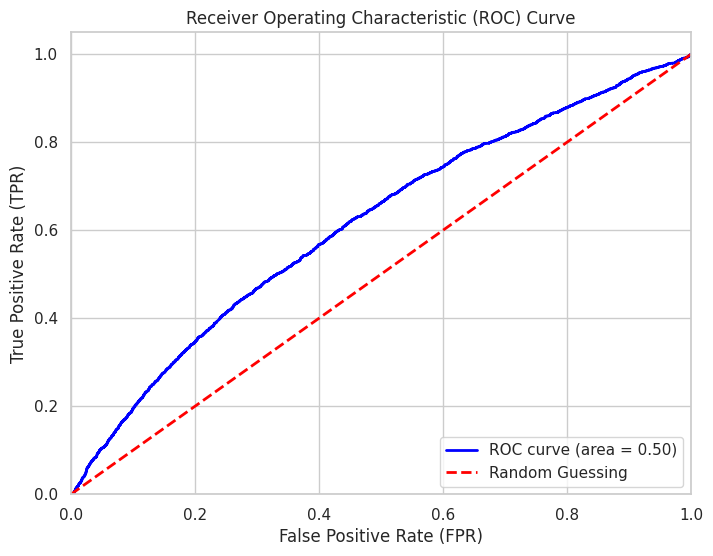

ROC AUC: 0.6134257084543053
Accuracy: 0.7833868861198425
Precision: 0.18198144268183178
Recall: 0.28638718794159207
F1 Score: 0.2225475841874085
Confusion Matrix:
 [[14755  2733]
 [ 1515   608]]


In [ ]:
#plotting the ROC Curve

from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)
fpr_nn, tpr_nn, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

precision_nn = precision_score(y_test, y_pred.round())
recall_nn = recall_score(y_test, y_pred.round())
f1_nn = f1_score(y_test, y_pred.round())
# Calculate accuracy
accuracy_nn = model.evaluate(X_test, y_test, verbose=0)[1]

conf_matrix_nn = confusion_matrix(y_test, y_pred.round())

# Calculate ROC curve
fpr_nn, tpr_nn, thresholds = roc_curve(y_test, y_pred)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC AUC:", roc_auc_nn)
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)
print("Confusion Matrix:\n", conf_matrix_nn)

## Model Comparison

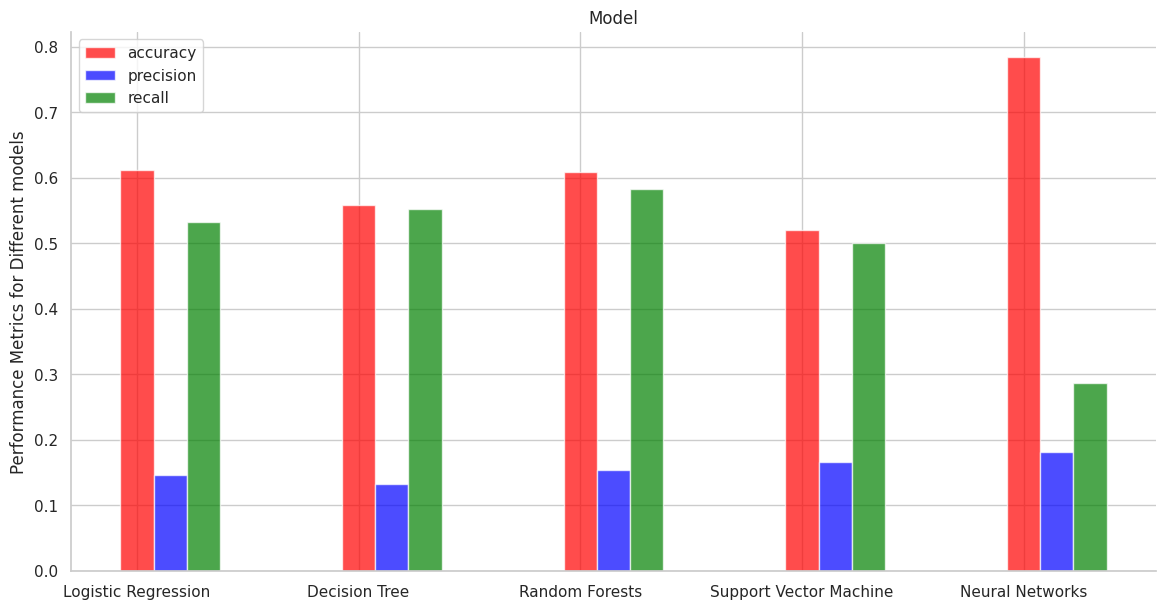

In [ ]:
##Comparing all the five performed algorithm by their accuracy, precision and recall metrics to know which model performs better with our dataset

plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','Support Vector Machine','Neural Networks']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_svm, accuracy_nn]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)


ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','Support Vector Machine','Neural Networks']
values = [precision_logit, precision_dtree, precision_rm, precision_svm, precision_nn]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests','Support Vector Machine','Neural Networks' ]
values = [recall_logit, recall_dtree, recall_rm,recall_svm,recall_nn ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')

# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

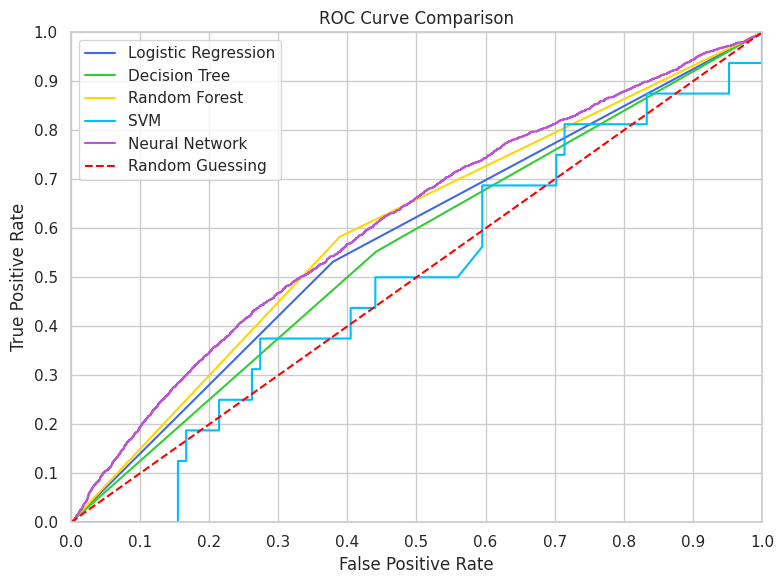

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated fpr_log, tpr_log, fpr_dtree, tpr_dtree, etc.

plt.figure(figsize=(8, 6))

# Plot ROC curves for each model with brighter colors
plt.plot(fpr_log, tpr_log, label='Logistic Regression', linestyle='-', color='royalblue')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree', linestyle='-', color='limegreen')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', linestyle='-', color='gold')
plt.plot(fpr_svm, tpr_svm, label='SVM', linestyle='-', color='deepskyblue')
plt.plot(fpr_nn, tpr_nn, label='Neural Network', linestyle='-', color='mediumorchid')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')

# Customize plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout for better display

plt.show()


## Conclusion

While Random Forest Algorithm model performs better on precision than others indicating its ability to make
accurate positive predictions:

• There is still a notable bias towards predicting negative cases (class 0), indicating the need for model optimization.

• Further analysis and refinement of the model are recommended to enhance its predictive capabilities for diabetic readmission within 30 days.

• Utilize cross-validation techniques such as k-fold cross-validation to evaluate model performance robustly and ensure generalizability.

• Revisit feature importance analysis to identify and prioritize the most influential features for predicting readmission within 30 days.

• Consider dropping less important features or combining correlated features to simplify the model without sacrificing predictive power.

• Explore and engineer new features that could capture more relevant information related to readmission risk, such as patient history, comorbidities, socioeconomic factors, and previous healthcare utilization
patterns